<a href="https://colab.research.google.com/github/Yahred/neural-networks/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np

# **Carga y preprocesamiento de datos**

MNIST es un conjunto de datos publico, sirve principalmente como material de estudio en la clasificación de imágenes.

Consiste en un conjunto de 60,000 muestras para entrenamiento y 10,000 muestras para pruebas.

El objetivo de este conjunto de datos es poder determinar el digito que se encuentra en las imágenes.

Por las características descritas se hará una clasificación de digitos.

Se hará uso de una paqueteria para la obtención del conjunto de datos.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Como practica utilizar fashion MNIST dataset para probar

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Se define la forma de las imágenes a utilizar, el conjunto de datos mnist, contiene imágenes de 28x28 en escala de grises.

In [ ]:
img_rows, img_cols = 28, 28

Se pueden mostrar estas imágenes mediante la libreria de matplotlib de python. Aunque tiene muchas formas de imprimir una imágenes, esta es una de ellas.

In [ ]:
def plot_samples(x, y, n= 5):
  for i, (img, y) in enumerate(zip(x[:n].reshape(n,28,28), y[:n])):
    plt.subplot(1,n,1+i)
    plt.imshow(img, cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    plt.title(y)

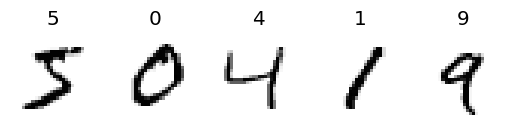

In [ ]:
plot_samples(x_train, y_train)

Ahora que podemos ver las imágenes que contiene el conjunto de datos, el siguiente paso consiste en realizar un preprocesamiento.

Si imprimimos una imagen, nos da la siguiente información:

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Se puede observar muy claramente que son un conjunto de datos con un valor minimo de 0, a un valor máximo de 255.

Debido a esto, es necesario realizar un proceso de normalización. Donde ahora los valores irán de 0-1.

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0])

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.     

A su vez, pasaremos los valores númericos del objetivo del MNIST a un vector de probabilidades.

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train[1000:1020])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


# **Definición del modelo**

Se definen los valores de algunos parámetros escenciales para el entrenamiento

In [ ]:
batch_size = 128
num_classes = 10
epochs = 4
input_shape = (28, 28, 1)

En este caso se utiliza la convolución como medida de extracción de características de las imágenes.

Para lograr lo anterior se hará uso de las capas Conv2D, que son capaces de aplicar la función de convolución a imágenes de 2 dimensiones.

Los parámetros escenciales de cada capa son:

*   filters.- parámetro para la cantidad de filtros a aplicar en las imágenes.
*   kernel_size.- Establece la forma de cada uno de los filtros, generalmente se utilizan (3,3), (5,5) o como máximo (7,7), sin embargo, se pueden aplicar filtros de mayor medida.
*   activation:- Establece la función de activación a utilizar.

Por otro lado las capas de MaxPooling2D son capas especiales, se utilizan para reducir las dimensiones de las imágenes, donde parten las imágenes en batches y destacan las caracteristicas relevantes seleccionando el mayor valor de cada región.

Por último, las capas de dropout se utilizan para inhabilitar aleatoriamente un porcentaje de neuronas. Sirven principalmente para evitar un poco el sobreajuste.



In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

# **Entrenamiento**

En este apartado de igual manera se aplican las entradas x_train donde se tiene el conjunto de imágenes, las cuales son asignadas a un objetivo. La red debe resaltar las características principales de las imágenes mediante las convoluciones. Posteriormente vectorizar el resultado y utilizar una red totalmente conectada para hacer la clasificación de las imágenes.

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/4
469/469 [==============================] - 16s 10ms/step - loss: 0.2983 - accuracy: 0.9079 - val_loss: 0.0617 - val_accuracy: 0.9789
Epoch 2/4
469/469 [==============================] - 4s 9ms/step - loss: 0.0956 - accuracy: 0.9722 - val_loss: 0.0429 - val_accuracy: 0.9864
Epoch 3/4
469/469 [==============================] - 4s 9ms/step - loss: 0.0695 - accuracy: 0.9794 - val_loss: 0.0429 - val_accuracy: 0.9866
Epoch 4/4
469/469 [==============================] - 4s 9ms/step - loss: 0.0580 - accuracy: 0.9833 - val_loss: 0.0331 - val_accuracy: 0.9891


# **Evaluación**

Se realiza la evaluación mediante la fución interna y los datos de prueba.

Con los resultados obtenidos se puede llegar a la conclusión que el entrenamiento fue bastante bueno, obteniendo un 99.08% de precisión.

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03305313363671303
Test accuracy: 0.9890999794006348


La función "predict" permite ingresar datos al modelo, y este retornará un conjunto de predicciones sobre esos mismos datos.

In [ ]:
p = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


A continuación se crea una función que tomará la posición del numero máximo de un arreglo. Lo cual significa que es el tipo o clase que tuvo más probabilidad de ser verdad.

In [ ]:
def get_numbers(predictions):
  l = []
  for p in predictions:
    l.append(np.argmax(p))
  return np.array(l)

Aquí se imprimem unos cuantas muestras de como se generan las predicciones. Al momento de pasar por la función previamente creada, se obtienen las predicciones del modelo.

In [ ]:
print(p[:5])
p2 = get_numbers(p)
print(p2)
#plot_samples(x_test, y_train)

[[7.1928422e-12 1.3586182e-08 3.4868185e-07 7.4025643e-08 1.9546552e-10
  9.5533081e-10 3.2012114e-12 9.9999940e-01 7.1055523e-10 1.1577410e-07]
 [9.7203019e-07 3.6095128e-06 9.9999499e-01 2.1103882e-07 4.0272358e-08
  1.2951942e-10 9.7472721e-08 1.0616143e-07 5.2415970e-08 1.0922206e-09]
 [2.0638403e-08 9.9997079e-01 1.0439870e-06 1.3194949e-07 5.8551454e-06
  2.7985138e-07 3.2286343e-06 1.6567119e-05 1.3607980e-06 7.2480856e-07]
 [9.9998379e-01 7.9661797e-09 2.7552383e-06 1.7966586e-08 2.5434139e-07
  1.7810339e-06 7.9689053e-06 2.6970693e-07 1.4284693e-06 1.8490208e-06]
 [1.6515628e-08 4.5021062e-07 6.2795516e-07 1.9396973e-09 9.9995220e-01
  1.5715857e-08 1.5063996e-07 1.2446183e-06 2.1166954e-07 4.5026303e-05]]
[7 2 1 ... 4 5 6]


Al desplegar las imágenes con el valor de predicción, podemos observar que el modelo se entreno adecuadamente para resolver el problema.

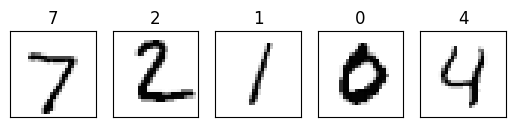

In [ ]:
plot_samples(x_test, p2)

Esta impresión es la curva de perdida del modelo, el mse es el valor de perdida de las muestras de entrenamiento. Para val_mse es el valor de perdida de las muestras de validación.

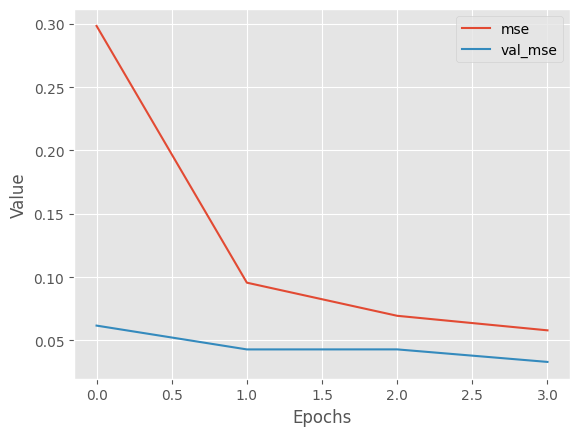

In [ ]:
from matplotlib import pyplot
pyplot.style.use("ggplot")
pyplot.plot(history.history['loss'], label='mse')
pyplot.plot(history.history['val_loss'], label='val_mse')
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()